In [1]:
import os
import numpy as np
import time
from scipy.special import erfinv
from numpy import log, pi,sqrt, exp,cos,sin,tan,argpartition,copy,trapz,mean,cov,vstack,hstack
import matplotlib.pyplot as plt
import random
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
def dataload(data):
    Pk0 = [[],[]]
    Pk2 = [[],[]]
    k = data[0,:,1]
    l0 = data[:,:,3]
    l2 = data[:,:,4]
    Pk0[0] = np.mean(l0,axis=0)
    Pk0[1] = np.std(l0,axis=0)
    Pk2[0] = np.mean(l2,axis=0)
    Pk2[1] = np.std(l2,axis=0)
    pk_cov = np.append(l0,l2,axis=1)
    cov = np.cov(np.array(pk_cov).T)
    # icov = np.linalg.inv(cov)
    return (k,Pk0,Pk2, cov)

def Pkload(catalogue, r_pk, redshift):
    # load the QUIJOTE observation
    tool = 'Pypower' # Powspec, Pypower, NCV
    Ddir = f'/Users/alain/Desktop/projectNU/main/data/kbin2/{catalogue}/{r_pk}_z{redshift}/pk'
    data = []
    nb = np.arange(100,200,1)
    for h in nb:
        realisation=np.loadtxt(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
        data.append(realisation)
    print(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
    (kev, pk0, pk2, icov) = dataload(np.array(data))
    pkl = [kev, pk0, pk2, icov]
    return pkl

/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/pk/fiducial_199_z1.0.pk


Text(0, 0.5, '$k \\, P_{\\ell}(k)$  $[h^{-2} \\, Mpc^{2}]$')

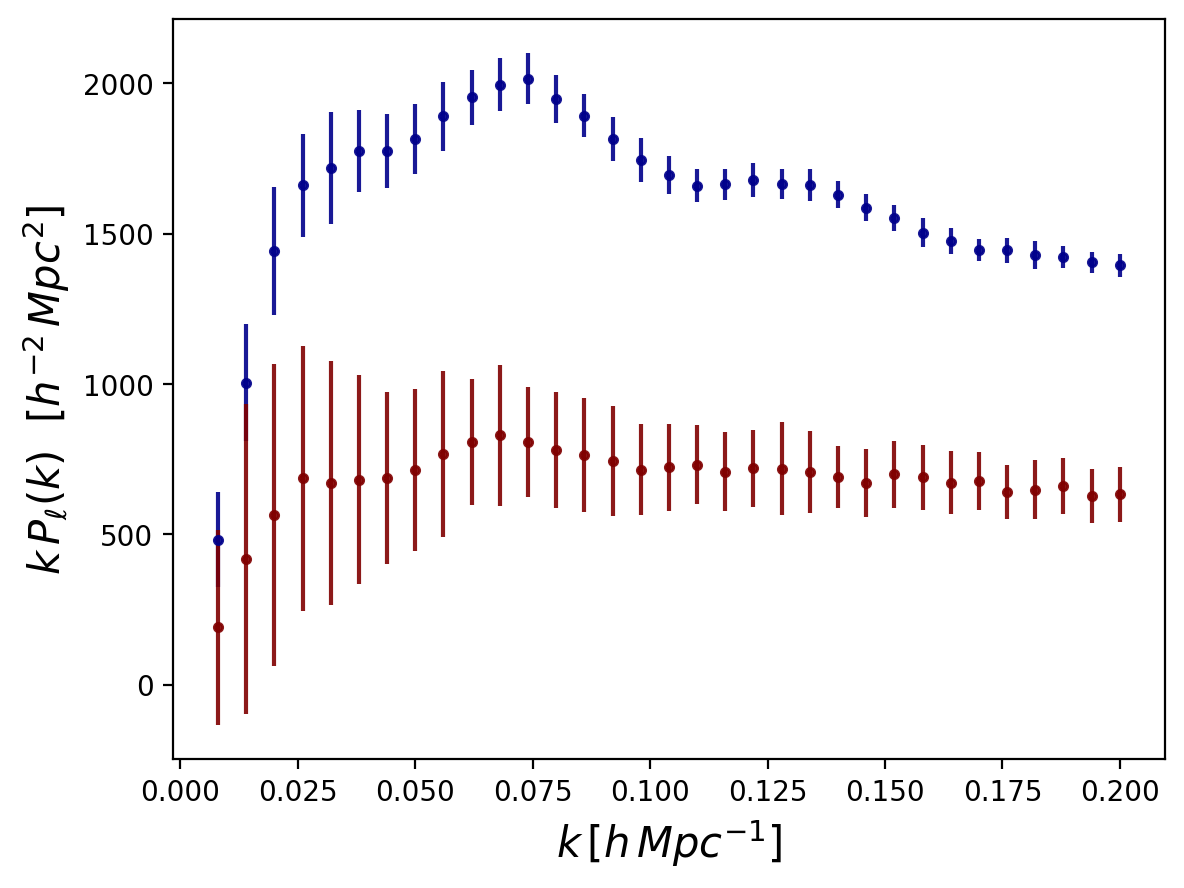

In [7]:
[k_ev, pk0, pk2, cov] = Pkload('fiducial', 'RSD', 1.0)
plt.errorbar(k_ev, k_ev*pk0[0], k_ev*pk0[1],color = 'darkblue', fmt='.', alpha = 0.9)
plt.errorbar(k_ev, k_ev*pk2[0], k_ev*pk2[1],color = 'maroon', fmt='.', alpha = 0.9)
plt.xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  15)
plt.ylabel(r'$k \, P_{\ell}(k)$  $[h^{-2} \, Mpc^{2}]$', fontsize =  15)

In [11]:
from cosmoprimo.fiducial import DESI
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, ShapeFitPowerSpectrumTemplate, StandardPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import KaiserTracerPowerSpectrumMultipoles, TNSTracerPowerSpectrumMultipoles, FOLPSTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.emulators import EmulatedCalculator, Emulator, TaylorEmulatorEngine
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.samples import Profiles

from desilike import setup_logging
setup_logging()  # for logging messages

[Macpomme.local:85569] shmem: mmap: an error occurred while determining whether or not /var/folders/n0/gs1g7p590qg7trf8pp8w29ch0000gn/T//ompi.Macpomme.501/jf.0/3845652480/sm_segment.Macpomme.501.e5380000.0 could be created.


In [13]:
kmin     = 0.008
kmax     = 0.2
binning  = 0.006
k_ev     = np.arange(kmin, kmax+0.001, binning)
klim     = {ell*2: (kmin,kmax,binning) for ell in range(2)}

emulator_fn = f'/Users/alain/Desktop/projectNU/main/RSD_tests/model/emulator_FOLPS_z1.0.npy'
profile_fn = f'/Users/alain/Desktop/projectNU/main/RC_tests/profiler_result/profile_FOLPS_RSD_z1.0.npy'
theory = FOLPSTracerPowerSpectrumMultipoles(pt=EmulatedCalculator.load(emulator_fn))
profile = Profiles.load(profile_fn)
pkl = theory(**profile.bestfit.choice(input=True))

[000022.35] [0/1] 07-12 09:00  Emulator                  INFO     Loading /Users/alain/Desktop/projectNU/main/RSD_tests/model/emulator_FOLPS_z1.0.npy.
[000028.13] [0/1] 07-12 09:00  Profiles                  INFO     Loading /Users/alain/Desktop/projectNU/main/RC_tests/profiler_result/profile_FOLPS_RSD_z1.0.npy.


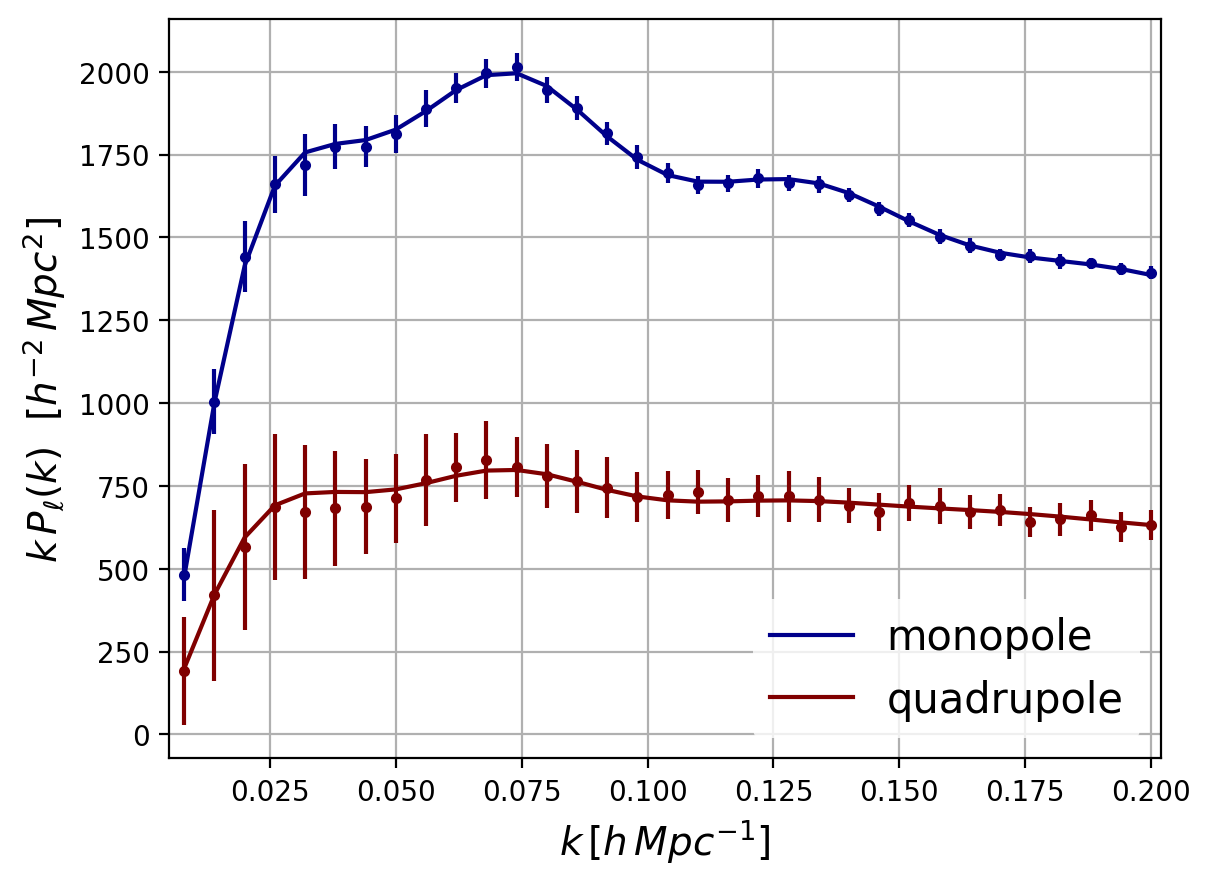

In [53]:
plt.errorbar(k_ev, k_ev*pk0[0], k_ev*pk0[1]/2,color = 'darkblue', fmt='.', alpha = 1.0)
plt.errorbar(k_ev, k_ev*pk2[0], k_ev*pk2[1]/2,color = 'maroon', fmt='.', alpha = 1.0)

plt.plot(k_ev, k_ev*pkl[0],color = 'darkblue', alpha = 1.0,label='monopole')
plt.plot(k_ev, k_ev*pkl[1],color = 'maroon', alpha = 1.0,label='quadrupole')

plt.xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
plt.ylabel(r'$k \, P_{\ell}(k)$  $[h^{-2} \, Mpc^{2}]$', fontsize =  14)
plt.xlim([0.005,0.202])
leg = plt.legend(loc =4, fontsize = 15)
leg.get_frame().set_linewidth(0.0)
plt.grid(True)
# plt.figtext(0.30, 0.58, r'$(H, \, \Omega_m, \, \Omega_\Lambda, \, A_s...)$', fontsize=18)
